#### Dependencies

In [3]:
#!pip install pystan
#!pip install fbprophet

In [175]:
import fbprophet

In [176]:
from fbprophet import Prophet

In [177]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [178]:
import pandas as pd
df = pd.read_csv('WHO-COVID-19-global-data.csv')

#### Data Preprocessing

In [179]:
df.head()

,ds,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,03-01-2020,AF,Afghanistan,EMRO,0,0,0,0
1,04-01-2020,AF,Afghanistan,EMRO,0,0,0,0
2,05-01-2020,AF,Afghanistan,EMRO,0,0,0,0
3,06-01-2020,AF,Afghanistan,EMRO,0,0,0,0
4,07-01-2020,AF,Afghanistan,EMRO,0,0,0,0


In [180]:
df.dtypes

ds                   object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [181]:
df['ds'] = pd.to_datetime(df['ds'])

In [182]:
df.dtypes

ds                   datetime64[ns]
Country_code                 object
Country                      object
WHO_region                   object
New_cases                     int64
Cumulative_cases              int64
New_deaths                    int64
Cumulative_deaths             int64
dtype: object

In [183]:
df.isnull().sum()

ds                     0
Country_code         727
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [184]:
df['ds'].nunique()

727

In [185]:
df.shape

(172299, 8)

In [186]:
total = df.groupby(['ds'])['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'].sum()

C:\Users\nikhi\AppData\Local\Temp/ipykernel_17788/1942298204.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total = df.groupby(['ds'])['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'].sum()


In [187]:
total.head(30)

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
ds,,,,
2020-01-02,2110,11963,46,259
2020-01-03,1836,87151,47,2982
2020-01-04,67646,914121,4423,44920
2020-01-05,82755,3245609,6460,240090
2020-01-06,127986,6178526,4543,400182
2020-01-07,171238,10490339,4869,552581
2020-01-08,295833,17640670,6768,736090
2020-01-09,224983,25864217,4659,924753
2020-01-10,329749,34671057,5828,1091834


#### Applying Facebook Prophet Model

In [188]:
total = total.rename({'Cumulative_cases':'y'}, axis='columns')

#df_prophet = total.rename(columns = {'Date_reported':'ds','Cumulative_cases':'y'})

In [189]:
#df_prophet.head()
total

,New_cases,y,New_deaths,Cumulative_deaths
ds,,,,
2020-01-02,2110,11963,46,259
2020-01-03,1836,87151,47,2982
2020-01-04,67646,914121,4423,44920
2020-01-05,82755,3245609,6460,240090
2020-01-06,127986,6178526,4543,400182
...,...,...,...,...
2021-12-25,959116,278683990,7742,5390831
2021-12-26,686839,279370829,4744,5395575
2021-12-27,439425,279810254,3903,5399478


In [194]:
total.to_csv('file1.csv')

In [195]:
df_prophet = pd.read_csv('file1.csv')

In [196]:
m = Prophet()

In [197]:
model = m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [198]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [199]:
future_global = model.make_future_dataframe(periods=100, freq='D')

In [200]:
future_global.head()

,ds
0,2020-01-02
1,2020-01-03
2,2020-01-04
3,2020-01-05
4,2020-01-06


In [201]:
future_global.shape

(827, 1)

In [202]:
df_prophet.shape

(727, 5)

In [203]:
df_prophet['ds'].tail()

722    2021-12-25
723    2021-12-26
724    2021-12-27
725    2021-12-28
726    2021-12-29
Name: ds, dtype: object

In [204]:
future_global.tail()

,ds
822,2022-04-04
823,2022-04-05
824,2022-04-06
825,2022-04-07
826,2022-04-08


In [205]:
prediction = model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,-3.269582e+06,-5.121750e+07,4.390980e+07,-3.269582e+06,-3.269582e+06,-1.246762e+06,-1.246762e+06,-1.246762e+06,-1.246762e+06,-1.246762e+06,-1.246762e+06,0.0,0.0,0.0,-4.516344e+06
1,2020-01-03,-3.154623e+06,-5.005822e+07,4.064834e+07,-3.154623e+06,-3.154623e+06,1.721433e+05,1.721433e+05,1.721433e+05,1.721433e+05,1.721433e+05,1.721433e+05,0.0,0.0,0.0,-2.982480e+06
2,2020-01-04,-3.039664e+06,-4.685548e+07,4.170183e+07,-3.039664e+06,-3.039664e+06,-1.207005e+05,-1.207005e+05,-1.207005e+05,-1.207005e+05,-1.207005e+05,-1.207005e+05,0.0,0.0,0.0,-3.160365e+06
3,2020-01-05,-2.924705e+06,-4.478549e+07,4.268485e+07,-2.924705e+06,-2.924705e+06,1.148957e+06,1.148957e+06,1.148957e+06,1.148957e+06,1.148957e+06,1.148957e+06,0.0,0.0,0.0,-1.775748e+06
4,2020-01-06,-2.809746e+06,-4.748043e+07,4.205855e+07,-2.809746e+06,-2.809746e+06,5.652184e+05,5.652184e+05,5.652184e+05,5.652184e+05,5.652184e+05,5.652184e+05,0.0,0.0,0.0,-2.244528e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,2022-04-04,2.871321e+08,2.412356e+08,3.362548e+08,2.827724e+08,2.914252e+08,5.652184e+05,5.652184e+05,5.652184e+05,5.652184e+05,5.652184e+05,5.652184e+05,0.0,0.0,0.0,2.876973e+08
823,2022-04-05,2.875187e+08,2.419693e+08,3.348371e+08,2.830988e+08,2.919063e+08,6.166237e+05,6.166237e+05,6.166237e+05,6.166237e+05,6.166237e+05,6.166237e+05,0.0,0.0,0.0,2.881353e+08
824,2022-04-06,2.879053e+08,2.399298e+08,3.347397e+08,2.834144e+08,2.923894e+08,-1.135479e+06,-1.135479e+06,-1.135479e+06,-1.135479e+06,-1.135479e+06,-1.135479e+06,0.0,0.0,0.0,2.867698e+08
825,2022-04-07,2.882919e+08,2.417355e+08,3.284456e+08,2.837284e+08,2.928692e+08,-1.246762e+06,-1.246762e+06,-1.246762e+06,-1.246762e+06,-1.246762e+06,-1.246762e+06,0.0,0.0,0.0,2.870451e+08


#### Visualization

In [206]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
822,2022-04-04,2.876973e+08,2.412356e+08,3.362548e+08
823,2022-04-05,2.881353e+08,2.419693e+08,3.348371e+08
824,2022-04-06,2.867698e+08,2.399298e+08,3.347397e+08
825,2022-04-07,2.870451e+08,2.417355e+08,3.284456e+08
826,2022-04-08,2.888506e+08,2.433936e+08,3.324787e+08


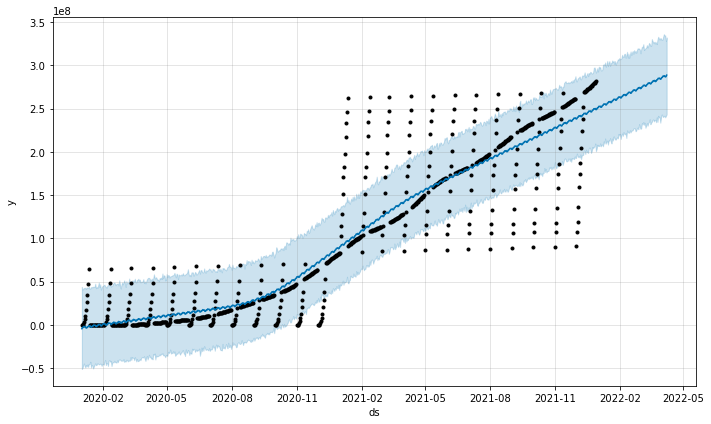

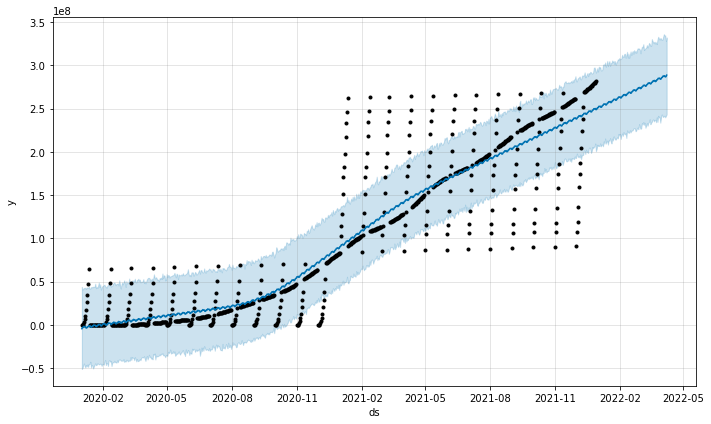

In [207]:
model.plot(prediction)

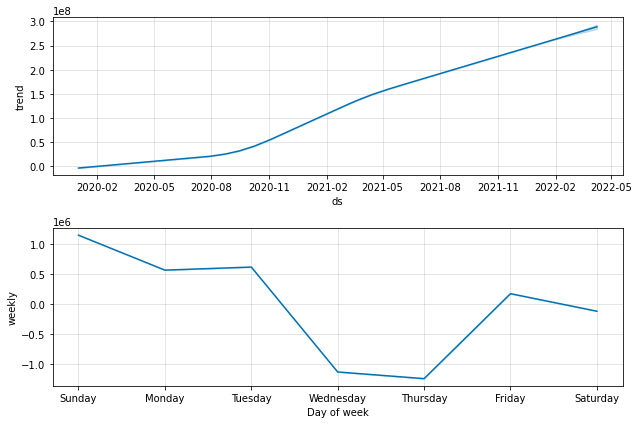

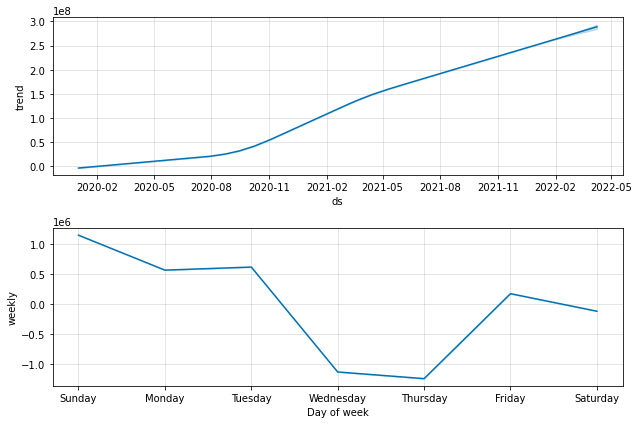

In [208]:
model.plot_components(prediction)

In [209]:
from fbprophet.plot import add_changepoints_to_plot

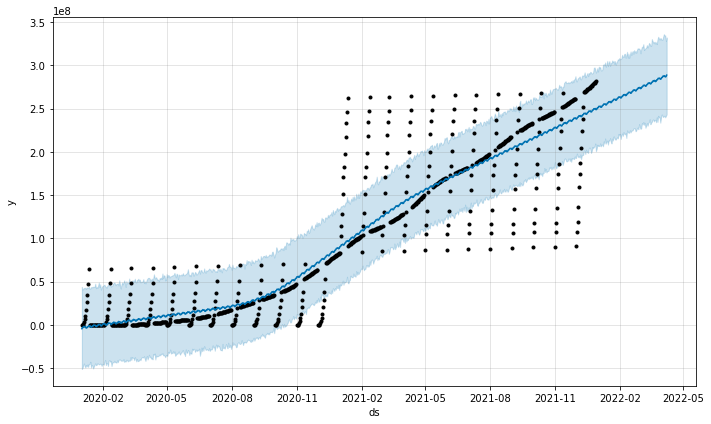

In [210]:
fig = model.plot(prediction)

[[<matplotlib.lines.Line2D at 0x186c93ab130>],

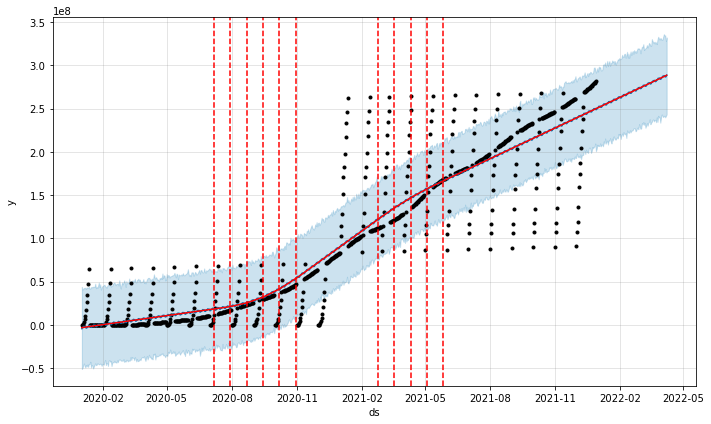

In [213]:
fig = model.plot(prediction)
add_changepoints_to_plot(fig.gca(), model,prediction)

In [214]:
from fbprophet.diagnostics import cross_validation

In [215]:
df_cv = cross_validation(model, horizon='100 Days', period='50 Days', initial='300 Days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-11-24 00:00:00 and 2021-09-20 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

In [216]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-11-25,3.667374e+07,1.549149e+07,5.637494e+07,60845791,2020-11-24
1,2020-11-26,3.593214e+07,1.588278e+07,5.707224e+07,61453575,2020-11-24
2,2020-11-27,3.625146e+07,1.656377e+07,5.575806e+07,62115654,2020-11-24
3,2020-11-28,3.715207e+07,1.662250e+07,5.799005e+07,62708892,2020-11-24
4,2020-11-29,3.798233e+07,1.705932e+07,5.868236e+07,63298203,2020-11-24


In [217]:
df_cv.shape

(700, 6)

#### Performance Metrics

In [218]:
from fbprophet.diagnostics import performance_metrics

In [219]:
df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,1.610619e+15,4.013252e+07,3.216956e+07,11781.878178,0.197440,0.628571
1,11 days,1.829100e+15,4.276798e+07,3.435873e+07,11782.006261,0.209184,0.585714
2,12 days,1.927573e+15,4.390414e+07,3.499132e+07,11782.067041,0.218909,0.571429
3,13 days,2.007610e+15,4.480636e+07,3.519723e+07,11782.093090,0.221342,0.585714
4,14 days,2.057240e+15,4.535680e+07,3.503094e+07,11782.102336,0.221342,0.600000


C:\Users\nikhi\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\nikhi\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


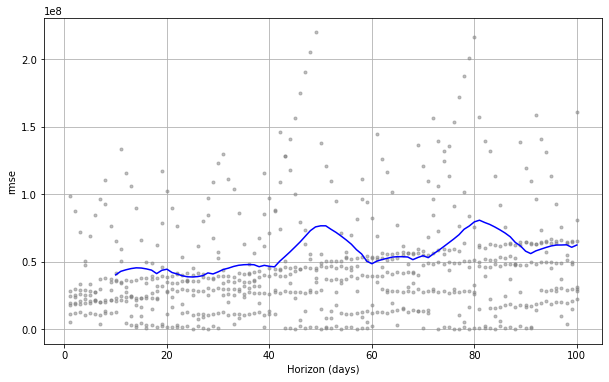

In [220]:
from fbprophet.plot import plot_cross_validation_metric
df_performance = plot_cross_validation_metric(df_cv, metric='rmse')

C:\Users\nikhi\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\nikhi\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


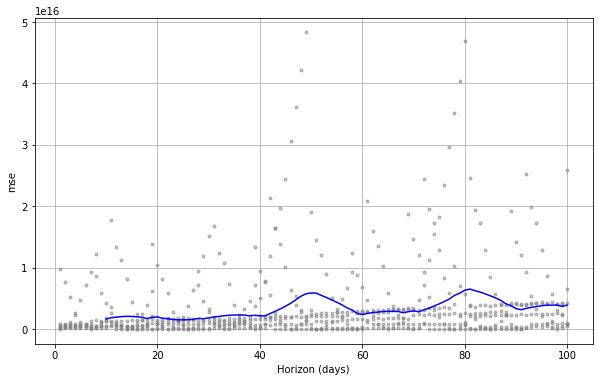

In [221]:
df_performance = plot_cross_validation_metric(df_cv, metric='mse')

C:\Users\nikhi\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\nikhi\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


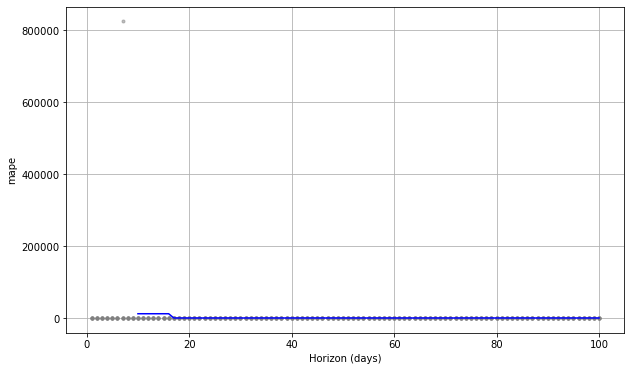

In [222]:
df_performance = plot_cross_validation_metric(df_cv, metric='mape')